In [4]:
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt


--2025-11-26 10:14:48--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.txt’

KDDTrain+.txt       100%[===================>]  18.22M  --.-KB/s    in 0.1s    

2025-11-26 10:14:49 (160 MB/s) - ‘KDDTrain+.txt’ saved [19109424/19109424]

--2025-11-26 10:14:49--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3441513 (3.3M) [text/plain]
Saving

In [5]:
import pandas as pd

cols = list(range(42))
train = pd.read_csv("KDDTrain+.txt", names=cols)
test = pd.read_csv("KDDTest+.txt", names=cols)


In [6]:
df = pd.concat([train, test], ignore_index=True)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
cols = list(range(42))
train = pd.read_csv("KDDTrain+.txt", names=cols)
test = pd.read_csv("KDDTest+.txt", names=cols)
df = pd.concat([train, test], ignore_index=True)


In [8]:
df[40] = df[40].apply(lambda x: 0 if x == "normal" else 1)


In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [0, 1, 2]   # protocol_type, service, flag
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(40, axis=1)   # remove target
y = df[40]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


Accuracy: 0.9995623485052518
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15411
           1       1.00      1.00      1.00     14293

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704

[[15400    11]
 [    2 14291]]


In [13]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [15]:
import joblib

# Save your trained model
joblib.dump(model, "rf_model.joblib")

# Save any encoders (if you have categorical features)
joblib.dump(encoders, "encoders.joblib")


NameError: name 'encoders' is not defined

In [16]:
import pandas as pd

# Example input for testing
data = {
    "ip": "192.168.1.5",
    "protocol_type": "tcp",
    "service": "ftp_data",
    "flag": "SF",
    "src_bytes": 491,
    "dst_bytes": 0
}

# Convert to DataFrame
df = pd.DataFrame([data])

# Check columns
print(df.columns.tolist())


['ip', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']


In [17]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create encoders for testing
categorical_cols = ["protocol_type", "service", "flag"]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # fit on your training data
    encoders[col] = le

# Save encoders for backend
joblib.dump(encoders, "encoders.joblib")


['encoders.joblib']

In [18]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("model.pkl")

# Load encoders for categorical features
encoders = joblib.load("encoders.joblib")


In [19]:
# Example input
data = {
    "ip": "192.168.1.5",
    "protocol_type": "tcp",
    "service": "ftp_data",
    "flag": "SF",
    "src_bytes": 491,
    "dst_bytes": 0
}

df = pd.DataFrame([data])  # Convert to DataFrame


In [20]:
features = df.drop(columns=["ip"]).values  # numpy array


In [21]:
print(features.shape)


(1, 5)


In [23]:
# X_train is your training data after encoding
feature_columns = X_train.columns.tolist()
import joblib
joblib.dump(feature_columns, "feature_columns.joblib")


['feature_columns.joblib']

In [24]:
import pandas as pd
import joblib

# Load feature columns saved from training
feature_columns = joblib.load("feature_columns.joblib")
encoders = joblib.load("encoders.joblib")
model = joblib.load("model.pkl")

# Input example
data = {
    "ip": "192.168.1.5",
    "protocol_type": "tcp",
    "service": "ftp_data",
    "flag": "SF",
    "src_bytes": 491,
    "dst_bytes": 0
}
df = pd.DataFrame([data])

# Encode categorical
for col in ["protocol_type", "service", "flag"]:
    df[col] = encoders[col].transform(df[col])

# If trained with get_dummies, convert
df = pd.get_dummies(df)

# Add missing columns as 0
for col in feature_columns:
    if col not in df.columns:
        df[col] = 0

# Reorder columns exactly like training
df = df[feature_columns]

# Predict
features = df.values
prediction = model.predict(features)[0]
print("Prediction:", prediction)


Prediction: 1


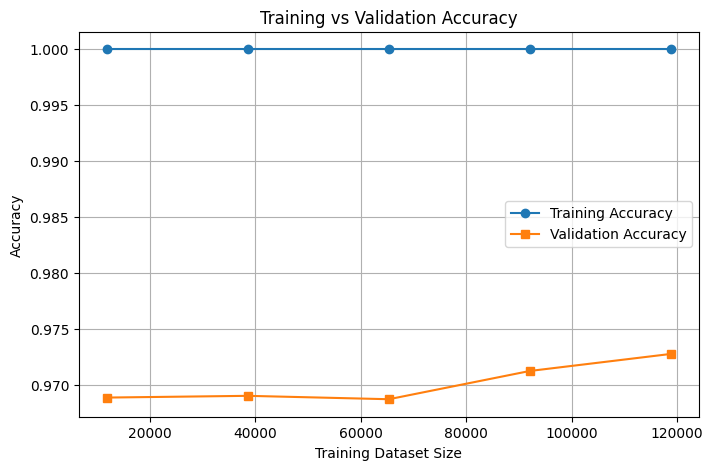

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Accuracy')

plt.title("Training vs Validation Accuracy")
plt.xlabel("Training Dataset Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


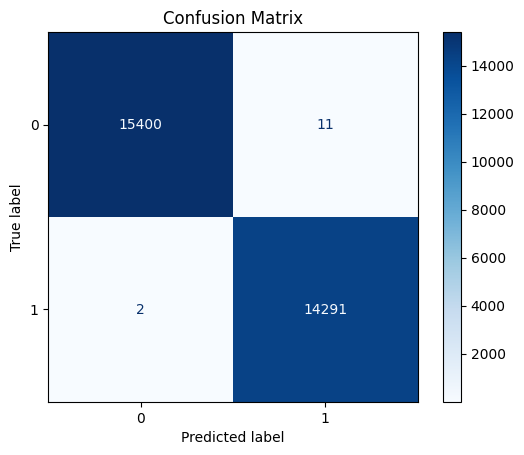

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9995623485052518

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15411
           1       1.00      1.00      1.00     14293

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704

